In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading in manually extracted dataset

This task involves the manual extraction of key financial data of Microsoft, Apple and Tesla from 10-K filings for the fiscal years 2021, 2022 and 2023.

The data from the financial statements have been extracted from SEC's EDGARS Database

In [66]:
df = pd.read_csv('extracted_data.csv')

In [67]:
df

,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Company
0,2021,53823,5644,62131,30548,11497,Tesla
1,2022,81462,12587,82338,36440,14724,Tesla
2,2023,96773,14974,106618,43009,13256,Tesla
3,2021,168088,61271,333779,191791,76740,Microsoft
4,2022,198270,72738,364840,198298,89035,Microsoft
5,2023,211915,72361,411976,205753,87582,Microsoft
6,2021,365817,94680,351002,287912,104038,Apple
7,2022,394328,99803,352755,302083,122151,Apple
8,2023,383285,96995,352583,290437,110543,Apple


# Calculate year-over-year changes for each financial metric

In [68]:
df = df.sort_values(by=['Company', 'Year'])

In [69]:
df['Revenue Growth (%)'] = df.groupby(['Company'])['Total Revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby(['Company'])['Net Income'].pct_change() * 100
df['Assets Growth (%)'] = df.groupby('Company')['Total Assets'].pct_change() * 100
df['Liabilities Growth (%)'] = df.groupby('Company')['Total Liabilities'].pct_change() * 100
df['Cash Flow from Operations Growth(%)'] = df.groupby('Company')['Cash Flow from Operating Activities'].pct_change() * 100

In [70]:
df

,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Company,Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),Cash Flow from Operations Growth(%)
6,2021,365817,94680,351002,287912,104038,Apple,NaN,NaN,NaN,NaN,NaN
7,2022,394328,99803,352755,302083,122151,Apple,7.793788,5.410858,0.499427,4.921990,17.409985
8,2023,383285,96995,352583,290437,110543,Apple,-2.800461,-2.813543,-0.048759,-3.855232,-9.502992
3,2021,168088,61271,333779,191791,76740,Microsoft,NaN,NaN,NaN,NaN,NaN
4,2022,198270,72738,364840,198298,89035,Microsoft,17.956071,18.715216,9.305858,3.392756,16.021631
5,2023,211915,72361,411976,205753,87582,Microsoft,6.882030,-0.518299,12.919636,3.759493,-1.631942
0,2021,53823,5644,62131,30548,11497,Tesla,NaN,NaN,NaN,NaN,NaN
1,2022,81462,12587,82338,36440,14724,Tesla,51.351653,123.015592,32.523217,19.287678,28.068192
2,2023,96773,14974,106618,43009,13256,Tesla,18.795267,18.964010,29.488207,18.026894,-9.970117


# Imputing NaN values with 0

In [71]:
df.fillna(0, inplace=True)

In [72]:
df

,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Company,Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),Cash Flow from Operations Growth(%)
6,2021,365817,94680,351002,287912,104038,Apple,0.000000,0.000000,0.000000,0.000000,0.000000
7,2022,394328,99803,352755,302083,122151,Apple,7.793788,5.410858,0.499427,4.921990,17.409985
8,2023,383285,96995,352583,290437,110543,Apple,-2.800461,-2.813543,-0.048759,-3.855232,-9.502992
3,2021,168088,61271,333779,191791,76740,Microsoft,0.000000,0.000000,0.000000,0.000000,0.000000
4,2022,198270,72738,364840,198298,89035,Microsoft,17.956071,18.715216,9.305858,3.392756,16.021631
5,2023,211915,72361,411976,205753,87582,Microsoft,6.882030,-0.518299,12.919636,3.759493,-1.631942
0,2021,53823,5644,62131,30548,11497,Tesla,0.000000,0.000000,0.000000,0.000000,0.000000
1,2022,81462,12587,82338,36440,14724,Tesla,51.351653,123.015592,32.523217,19.287678,28.068192
2,2023,96773,14974,106618,43009,13256,Tesla,18.795267,18.964010,29.488207,18.026894,-9.970117


In [73]:
df.to_csv('data_report.csv')

# Calculating the average year-on-year growth rates for each metric

In [74]:
# Not using the growth rates of 2021 because initially it is 0.
df_filtered = df[df['Year'] > 2021]
# Calculate the average YoY growth rate for each metric per company
avg_growth_rates = df_filtered.groupby('Company')[['Revenue Growth (%)', 'Net Income Growth (%)', 'Assets Growth (%)', 
                                  'Liabilities Growth (%)', 'Cash Flow from Operations Growth(%)']].mean()

In [75]:
print("Year on Year growth rate for Apple, Microsoft and Tesla from Fiscal Year 2021 - 2023")
avg_growth_rates

Year on Year growth rate for Apple, Microsoft and Tesla from Fiscal Year 2021 - 2023


,Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),Cash Flow from Operations Growth(%)
Company,,,,,
Apple,2.496664,1.298657,0.225334,0.533379,3.953496
Microsoft,12.419050,9.098459,11.112747,3.576124,7.194844
Tesla,35.073460,70.989801,31.005712,18.657286,9.049037


In [76]:
avg_growth_rates.to_csv('summary_report.csv')

Text(0, 0.5, 'Growth (%)')

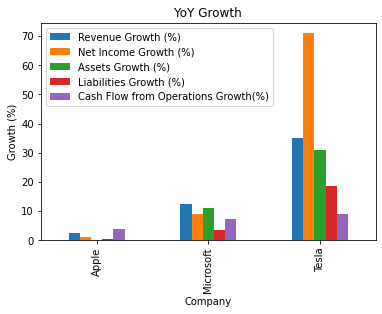

In [85]:
avg_growth_rates.plot(kind="bar", title="test")
plt.title("YoY Growth")
plt.xlabel("Company")
plt.ylabel("Growth (%)")